<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/dimred/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows



## Dimensionality reduction of iris data using PCA <a class="anchor" id="PCA-iris"></a>

In this section, we show how to find low dimensional structure
in an unlabeled version of the Iris dataset by fitting a PCA model.
We will use sklearn.

In [6]:
# Visualize raw 3d data

from sklearn.datasets import load_iris


from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

iris = load_iris()
X = iris.data 
y = iris.target



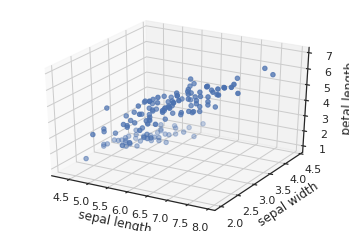

In [7]:

fig = plt.figure().gca(projection='3d')
fig.scatter(X[:,0], X[:,1], X[:,2])
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal width')
fig.set_zlabel('petal length')
plt.show()

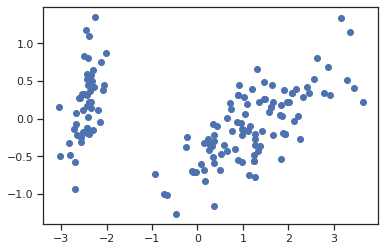

In [8]:
# 2d projection of points

from sklearn.decomposition import PCA

X = iris.data[:,0:3]
pca_xy = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(pca_xy[:,0], pca_xy[:,1])
#save_fig("iris-pca")
plt.show()

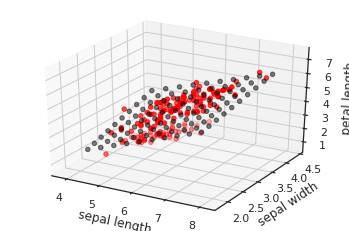

In [9]:
# plot latent 2d projection of points in ambient 3d feature space

pca = PCA(n_components=2)
mu = np.mean(X, axis=0)
Xc = X - mu # center the data
pca.fit(Xc)
W = pca.components_.T # D*K
Z = np.dot(Xc, W) # N * K latent scores
Xrecon = np.dot(Z, W.T) + mu # N*D

# span the latent space in area covered by data
a = np.min(Z[:,0])
b = np.max(Z[:,0])
c = np.min(Z[:,1])
d = np.max(Z[:,1])
z0 = np.linspace(a, b, 10)
z1 = np.linspace(c, d, 10)
ZZ0, ZZ1 = np.meshgrid(z0, z1)
Zgrid = np.c_[ZZ0.ravel(), ZZ1.ravel()] # 100x2
plane = np.dot(Zgrid, W.T) + mu # N*D

latent_corners = np.array([ [a,c], [a,d], [b,c], [b,d] ]) # 4x2
recon_corners  = np.dot(latent_corners, W.T) + mu # 4x3

fig = plt.figure().gca(projection='3d')
scatterplot = fig.scatter(X[:,0], X[:,1], X[:,2], color="red")
#recon = fig.scatter(Xrecon[:,0], Xrecon[:,1], Xrecon[:,2], marker='*', color='green')
lineplot = fig.scatter(plane[:,0], plane[:,1], plane[:,2], color="black", alpha=0.5)
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal width')
fig.set_zlabel('petal length')
#save_fig("iris-pca-3d")
plt.show()
